In [1]:
import matplotlib.pyplot as plt
import pandas as pd, json
import numpy as np

In [2]:
import matplotlib
matplotlib.rcParams['legend.handlelength'] = 1
matplotlib.rcParams['legend.handleheight'] = 1

In [3]:
"""
Load Precision-Recall-Fscore data (Fig. 8)
"""

metrics = 'PRF'
data = json.loads(open('total_results_ALL_'+metrics+'.json').read())[-2:]
data_test_ALL = data[0]
data_tune_ALL = data[1]

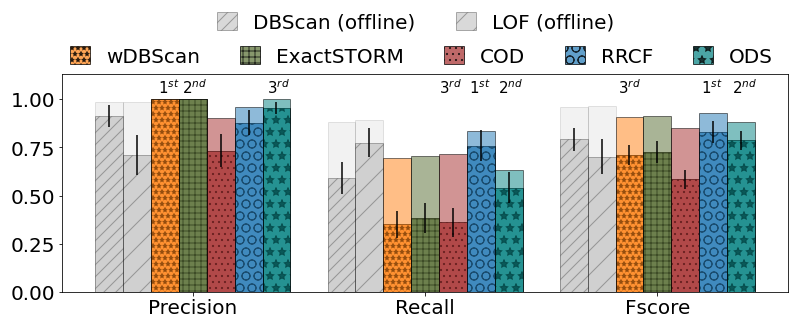

In [4]:
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.12
opacity = 0.7
opacity_tuning=0.5
opacity_offline_diff = 0.4

fontsize = 20

fig, ax = plt.subplots(figsize=(13,4), sharex=True)

dbscan_bar = ax.bar(index-3*bar_width,
        [float(x) for x in data_test_ALL['scores'][0][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][0][2::2]],
        alpha=opacity - opacity_offline_diff,
        color='gray',
        edgecolor='black',
        label='DBScan (offline)',
        hatch="//")

ax.bar(index-3*bar_width,
        [float(x) for x in data_tune_ALL['scores'][0][1::2]],
        bar_width,
        alpha=opacity_tuning - opacity_offline_diff,
        color='gray',
        edgecolor='black')

lof_bar = ax.bar(index-2*bar_width,
        [float(x) for x in data_test_ALL['scores'][1][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][1][2::2]],
        alpha=opacity - opacity_offline_diff,
        color='gray',
        edgecolor='black',
        label='LOF (offline)',
        hatch="/")

ax.bar(index-2*bar_width,
        [float(x) for x in data_tune_ALL['scores'][1][1::2]],
        bar_width,
        alpha=opacity_tuning - opacity_offline_diff,
        color='gray',
        edgecolor='black')

wdbscan_bar = ax.bar(index-1*bar_width,
        [float(x) for x in data_test_ALL['scores'][2][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][2][2::2]],
        alpha=opacity,
        color='C1',
        edgecolor='black',
        label='wDBScan',
        hatch="**")

ax.bar(index-1*bar_width,
        [float(x) for x in data_tune_ALL['scores'][2][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='C1',
        edgecolor='black')

exactstorm_bar = ax.bar(index,
        [float(x) for x in data_test_ALL['scores'][3][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][3][2::2]],
        alpha=opacity,
        color='darkolivegreen',
        edgecolor='black',
        label='ExactSTORM',
        hatch="++")

ax.bar(index,
        [float(x) for x in data_tune_ALL['scores'][3][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='darkolivegreen',
        edgecolor='black')

cod_bar = ax.bar(index+1*bar_width,
        [float(x) for x in data_test_ALL['scores'][4][1::2]],
        bar_width,
        alpha=opacity,
        yerr=[float(x) for x in data_test_ALL['scores'][4][2::2]],
        color='brown',
        edgecolor='black',
        label='COD',
        hatch="..")

ax.bar(index+1*bar_width,
        [float(x) for x in data_tune_ALL['scores'][4][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='brown',
        edgecolor='black')

rrcf_bar = ax.bar(index+2*bar_width,
        [float(x) for x in data_test_ALL['scores'][5][1::2]],
        bar_width,
        alpha=opacity,
        yerr=[float(x) for x in data_test_ALL['scores'][5][2::2]],
        color='C0',
        edgecolor='black',
        label='RRCF',
        hatch="O")

ax.bar(index+2*bar_width,
        [float(x) for x in data_tune_ALL['scores'][5][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='C0',
        edgecolor='black')

ods_bar = ax.bar(index+3*bar_width,
        [float(x) for x in data_test_ALL['scores'][6][1::2]],
        bar_width,
        alpha=opacity,
        yerr=[float(x) for x in data_test_ALL['scores'][6][2::2]],
        color='teal',
        edgecolor='black',
        label='ODS',
        hatch="*")

ax.bar(index+3*bar_width,
        [float(x) for x in data_tune_ALL['scores'][6][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='teal',
        edgecolor='black')

ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=fontsize)

ax.set_xticks(range(3))
ax.set_xticklabels(['Precision', 'Recall', 'Fscore'])
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=fontsize)

ax.set_ylim(0,1.13)
ax.text(-0.15,1.03, '$1^{st}$', fontsize=15)
ax.text(-0.045,1.03, '$2^{nd}$', fontsize=15)
ax.text(0.32,1.03, '$3^{rd}$', fontsize=15)

ax.text(1.19,1.03, '$1^{st}$', fontsize=15)
ax.text(1.315,1.03, '$2^{nd}$', fontsize=15)
ax.text(1.06,1.03, '$3^{rd}$', fontsize=15)

ax.text(2.19,1.03, '$1^{st}$', fontsize=15)
ax.text(2.32,1.03, '$2^{nd}$', fontsize=15)
ax.text(1.83,1.03, '$3^{rd}$', fontsize=15)

fig.legend([dbscan_bar, lof_bar],
          ['DBScan (offline)','LOF (offline)'],
          bbox_to_anchor=(0.675, 1.15),
          ncol=4, fancybox=False, shadow=False, fontsize=20, frameon=False)

fig.legend([wdbscan_bar, exactstorm_bar, cod_bar, rrcf_bar, ods_bar],
          ['wDBScan', 'ExactSTORM', 'COD','RRCF', 'ODS'],
          bbox_to_anchor=(0.845, 1.03),
          ncol=5, fancybox=False, shadow=False, fontsize=20, frameon=False)

plt.savefig('algorithms_comparison_'+metrics+'.pdf',  bbox_inches='tight', pad_inches=0)

In [5]:
"""
Load Accuracy-Markedness-Informedness data (Fig. 9)
"""

metrics = 'AMI'
data = json.loads(open('total_results_ALL_'+metrics+'.json').read())[-2:]
data_test_ALL = data[0]
data_tune_ALL = data[1]

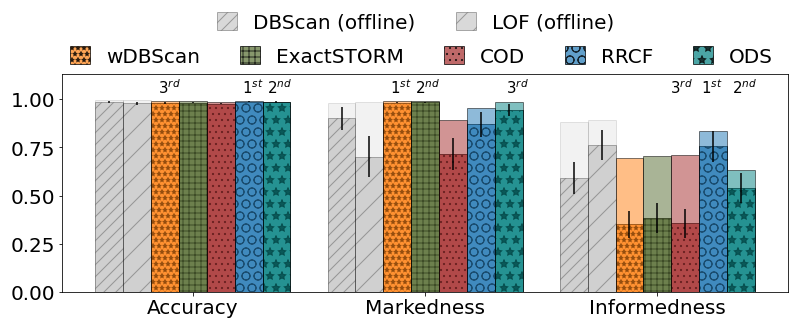

In [6]:
n_groups = 3
index = np.arange(n_groups)
bar_width = 0.12
opacity = 0.7
opacity_tuning=0.5
opacity_offline_diff = 0.4

fontsize = 20

fig, ax = plt.subplots(figsize=(13,4), sharex=True)

dbscan_bar = ax.bar(index-3*bar_width,
        [float(x) for x in data_test_ALL['scores'][0][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][0][2::2]],
        alpha=opacity - opacity_offline_diff,
        color='gray',
        edgecolor='black',
        label='DBScan (offline)',
        hatch="//")

ax.bar(index-3*bar_width,
        [float(x) for x in data_tune_ALL['scores'][0][1::2]],
        bar_width,
        alpha=opacity_tuning - opacity_offline_diff,
        color='gray',
        edgecolor='black')

lof_bar = ax.bar(index-2*bar_width,
        [float(x) for x in data_test_ALL['scores'][1][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][1][2::2]],
        alpha=opacity - opacity_offline_diff,
        color='gray',
        edgecolor='black',
        label='LOF (offline)',
        hatch="/")

ax.bar(index-2*bar_width,
        [float(x) for x in data_tune_ALL['scores'][1][1::2]],
        bar_width,
        alpha=opacity_tuning - opacity_offline_diff,
        color='gray',
        edgecolor='black')

wdbscan_bar = ax.bar(index-1*bar_width,
        [float(x) for x in data_test_ALL['scores'][2][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][2][2::2]],
        alpha=opacity,
        color='C1',
        edgecolor='black',
        label='wDBScan',
        hatch="**")

ax.bar(index-1*bar_width,
        [float(x) for x in data_tune_ALL['scores'][2][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='C1',
        edgecolor='black')

exactstorm_bar = ax.bar(index,
        [float(x) for x in data_test_ALL['scores'][3][1::2]],
        bar_width,
        yerr=[float(x) for x in data_test_ALL['scores'][3][2::2]],
        alpha=opacity,
        color='darkolivegreen',
        edgecolor='black',
        label='ExactSTORM',
        hatch="++")

ax.bar(index,
        [float(x) for x in data_tune_ALL['scores'][3][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='darkolivegreen',
        edgecolor='black')

cod_bar = ax.bar(index+1*bar_width,
        [float(x) for x in data_test_ALL['scores'][4][1::2]],
        bar_width,
        alpha=opacity,
        yerr=[float(x) for x in data_test_ALL['scores'][4][2::2]],
        color='brown',
        edgecolor='black',
        label='COD',
        hatch="..")

ax.bar(index+1*bar_width,
        [float(x) for x in data_tune_ALL['scores'][4][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='brown',
        edgecolor='black')

rrcf_bar = ax.bar(index+2*bar_width,
        [float(x) for x in data_test_ALL['scores'][5][1::2]],
        bar_width,
        alpha=opacity,
        yerr=[float(x) for x in data_test_ALL['scores'][5][2::2]],
        color='C0',
        edgecolor='black',
        label='RRCF',
        hatch="O")

ax.bar(index+2*bar_width,
        [float(x) for x in data_tune_ALL['scores'][5][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='C0',
        edgecolor='black')

ods_bar = ax.bar(index+3*bar_width,
        [float(x) for x in data_test_ALL['scores'][6][1::2]],
        bar_width,
        alpha=opacity,
        yerr=[float(x) for x in data_test_ALL['scores'][6][2::2]],
        color='teal',
        edgecolor='black',
        label='ODS',
        hatch="*")

ax.bar(index+3*bar_width,
        [float(x) for x in data_tune_ALL['scores'][6][1::2]],
        bar_width,
        alpha=opacity_tuning,
        color='teal',
        edgecolor='black')

ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=fontsize)

ax.set_xticks(range(3))
ax.set_xticklabels(['Accuracy', 'Markedness', 'Informedness'])
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.tick_params(axis='both', which='minor', labelsize=fontsize)

ax.set_ylim(0,1.13)
ax.text(0.21,1.03, '$1^{st}$', fontsize=15)
ax.text(0.32,1.03, '$2^{nd}$', fontsize=15)
ax.text(-0.15,1.03, '$3^{rd}$', fontsize=15)

ax.text(0.85,1.03, '$1^{st}$', fontsize=15)
ax.text(0.955,1.03, '$2^{nd}$', fontsize=15)
ax.text(1.35,1.03, '$3^{rd}$', fontsize=15)

ax.text(2.19,1.03, '$1^{st}$', fontsize=15)
ax.text(2.32,1.03, '$2^{nd}$', fontsize=15)
ax.text(2.055,1.03, '$3^{rd}$', fontsize=15)

fig.legend([dbscan_bar, lof_bar],
          ['DBScan (offline)','LOF (offline)'],
          bbox_to_anchor=(0.675, 1.15),
          ncol=4, fancybox=False, shadow=False, fontsize=20, frameon=False)

fig.legend([wdbscan_bar, exactstorm_bar, cod_bar, rrcf_bar, ods_bar],
          ['wDBScan', 'ExactSTORM', 'COD','RRCF', 'ODS'],
          bbox_to_anchor=(0.845, 1.03),
          ncol=5, fancybox=False, shadow=False, fontsize=20, frameon=False)

plt.savefig('algorithms_comparison_'+metrics+'.pdf',  bbox_inches='tight', pad_inches=0)